In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/one-lac-bin/model_1_lac.bin
/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
dataset = pd.read_csv("../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

In [3]:
dataset.head(20)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D,Conv1D,LSTM
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [5]:
dataset.isnull().values.any()

False

In [6]:
dataset.shape

(50000, 2)

In [7]:
dataset['review'][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [8]:
import seaborn as sns

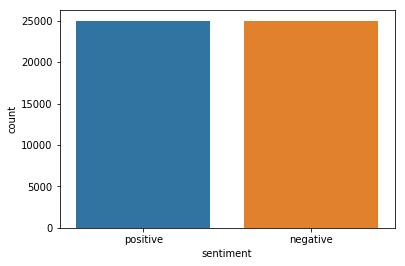

In [9]:
sns.countplot(x='sentiment', data=dataset)

# PreProcessing Reviews

In [10]:
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub('', text)

def preprocessing_text(text):
    # Remove html tag
    sentence = remove_tags(text)
    # Remove link
    sentence = re.sub(r'https:\/\/[a-zA-Z]*\.com',' ',sentence)
    # Remove number
    sentence = re.sub(r'\d+',' ',sentence)
    # Remove white space
    sentence = re.sub(r'\s+',' ',sentence)
    # Remove single character
    sentence = re.sub(r"\b[a-zA-Z]\b", ' ', sentence)
    # Remove bracket
    sentence = re.sub(r'\W+',' ',sentence)
    # Make sentence lowercase
    sentence = sentence.lower()
    return sentence


    

In [11]:
pre_proces_sen = []
sentences = list(dataset['review'])
for sen in sentences:
    pre_proces_sen.append(preprocessing_text(sen))

In [12]:
print(pre_proces_sen[2])

 thought this was wonderful way to spend time on too hot summer weekend sitting in the air conditioned theater and watching light hearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point risk addiction thought it was proof that woody allen is still fully in control of the style many of us have grown to love this was the most laughed at one of woody comedies in years dare say decade while ve never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into average but spirited young woman this may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman great comedy to go see with friends 


# Removing Stopwords

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [14]:
stop = ['has', 'its', "needn't", 'm', "wouldn't", 'but', 'he', "mustn't", 'his', 'there', 'or', "won't", 'can', 'd', "hadn't", 'how', 'hasn', 'very', 'wouldn', 'own', "doesn't", 'their', "isn't", 'an', "haven't", "wasn't", 'those', 'once', "shan't", 'when', "aren't", 've', 'it', "it's", 'of', "don't", 'and', 'down', 'yours', 'to', 'over', "she's", 'we', 'they', 'haven', 'having', 'ain', 'no', 'her', 'you', 'then', 'just', 'didn', 'into', 'before', 'shouldn', 'here', 'yourselves', 's', 'will', 'which', 'are', 'who', 'with', "you'd", 'this', 'me', 'themselves', "you've", 'hadn', 'mightn', 'she', 'o', 'more', 'whom', 'for', 'him', 'again', 'below', 'few', 'most', 'been', 'such', 'shan', 'is', 'ourselves', 'y', 'by', 'being', 'in', 'mustn', "you'll", 'herself', 'yourself', 'ours', 'between', 'had', 'other', "should've", 't', 'isn', 'them', 'himself', 're', 'doing', 'only', 'where', 'your', 'after', 'so', 'll', 'against', 'the', 'about', 'each', 'aren', 'wasn', "couldn't", 'have', 'ma', 'i', 'my', "mightn't", 'as', 'from', 'itself', 'under', 'same', 'why', 'any', 'our', 'be', 'off', "hasn't", 'through', "you're", 'was', 'did', "shouldn't", 'myself', 'some', 'theirs', 'hers', 'further', 'do', 'now', 'than', 'too', 'during', 'at', 'because', 'doesn', 'needn', "weren't", 'don', "didn't", 'couldn', 'what', 'does', 'if', 'up', 'on', 'these', 'should', 'all', "that'll", 'above', 'weren', 'that', 'a', 'while', 'both', 'until', 'were', 'am']

In [15]:
for i in range(len(pre_proces_sen)):
    x = pre_proces_sen[i]
    x = word_tokenize(x)
    new_x_list = [word for word in x if word not in stop]
    pre_proces_sen[i] = ' '.join(new_x_list)
    if i% 2000 == 0:
        print(i,end=" ")


0 2000 4000 6000 8000 10000 12000 14000 16000 18000 20000 22000 24000 26000 28000 30000 32000 34000 36000 38000 40000 42000 44000 46000 48000 

In [16]:
print(pre_proces_sen[2])

thought wonderful way spend time hot summer weekend sitting air conditioned theater watching light hearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize not match point risk addiction thought proof woody allen still fully control style many us grown love laughed one woody comedies years dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young woman may not crown jewel career wittier devil wears prada interesting superman great comedy go see friends


In [17]:
y  = dataset['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [18]:
X = pre_proces_sen

# Train_Test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Tokenizing

In [20]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [21]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

92789


# Transfer Learning

In [22]:
import gensim
WORD2VEC_MODEL = "../input/one-lac-bin/model_1_lac.bin"
#load word2vec model
word2vec = gensim.models.KeyedVectors.load_word2vec_format(WORD2VEC_MODEL, binary=True, limit=100000)

# Embedding_Matrics

In [23]:
embedding_weights = np.zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    #embedding_vector = word2vec.get(word)
    try:
        embedding_weights[index] = word2vec[word]
    except:
        pass 

In [24]:
print(word2vec['not'][:40])

[ 0.08496094 -0.09521484  0.11914062  0.11181641 -0.11132812  0.04980469
  0.11425781 -0.09863281  0.09960938 -0.04150391  0.01287842 -0.18164062
 -0.11621094  0.02380371 -0.1640625   0.12695312  0.12060547  0.00946045
  0.04150391 -0.09521484 -0.12988281 -0.11523438  0.07519531 -0.04980469
  0.06591797 -0.02905273 -0.08984375  0.08447266 -0.04785156 -0.02709961
 -0.10302734  0.11083984  0.01422119 -0.09863281  0.04125977  0.07226562
  0.10986328  0.01135254 -0.01483154  0.0456543 ]


# Convolutional Neural Network

In [25]:
model = Sequential()

embedding_layer = Embedding(vocab_size, 300, weights=[embedding_weights], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2)),
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [26]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 300)          27836700  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           192128    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 28,028,957
Trainable params: 192,257
Non-trainable params: 27,836,700
_________________________________________________________________
None


In [27]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Train on 32000 samples, validate on 8000 samples
Epoch 1/6
32000/32000 [==============================] - 39s 1ms/step - loss: 0.4216 - acc: 0.8046 - val_loss: 0.3377 - val_acc: 0.8526
Epoch 2/6
32000/32000 [==============================] - 39s 1ms/step - loss: 0.3085 - acc: 0.8696 - val_loss: 0.3091 - val_acc: 0.8671
Epoch 3/6
32000/32000 [==============================] - 40s 1ms/step - loss: 0.2544 - acc: 0.8998 - val_loss: 0.2957 - val_acc: 0.8758
Epoch 4/6
32000/32000 [==============================] - 39s 1ms/step - loss: 0.2109 - acc: 0.9195 - val_loss: 0.2914 - val_acc: 0.8783
Epoch 5/6
32000/32000 [==============================] - 40s 1ms/step - loss: 0.1714 - acc: 0.9391 - val_loss: 0.2888 - val_acc: 0.8798
Epoch 6/6
10000/10000 [==============================] - 5s 520us/step


In [28]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.2910875992178917
Test Accuracy: 0.8779000043869019


# Plotting Accuracy and Validation accuracy

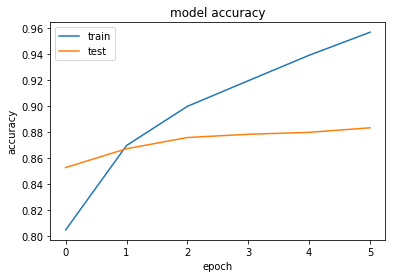

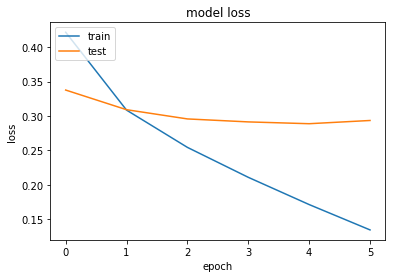

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# LSTM Model ###Final Model

In [30]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_weights], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [31]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 300)          27836700  
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 28,056,477
Trainable params: 219,777
Non-trainable params: 27,836,700
_________________________________________________________________
None


In [32]:
history =  model.fit(X_train, y_train,  batch_size=128, epochs=8, validation_split=0.2,verbose=1)

Train on 32000 samples, validate on 8000 samples
Epoch 1/8
32000/32000 [==============================] - 106s 3ms/step - loss: 0.4603 - acc: 0.7830 - val_loss: 0.3511 - val_acc: 0.8464
Epoch 2/8
32000/32000 [==============================] - 106s 3ms/step - loss: 0.3554 - acc: 0.8482 - val_loss: 0.3368 - val_acc: 0.8566
Epoch 3/8
32000/32000 [==============================] - 101s 3ms/step - loss: 0.3404 - acc: 0.8556 - val_loss: 0.3326 - val_acc: 0.8530
Epoch 4/8
32000/32000 [==============================] - 99s 3ms/step - loss: 0.3128 - acc: 0.8692 - val_loss: 0.3451 - val_acc: 0.8579
Epoch 5/8
32000/32000 [==============================] - 102s 3ms/step - loss: 0.3077 - acc: 0.8742 - val_loss: 0.2916 - val_acc: 0.8800
Epoch 6/8
32000/32000 [==============================] - 103s 3ms/step - loss: 0.2873 - acc: 0.8815 - val_loss: 0.3769 - val_acc: 0.8491
Epoch 7/8
32000/32000 [==============================] - 108s 3ms/step - loss: 0.2838 - acc: 0.8853 - val_loss: 0.2872 - val_acc: 

# Evaluating on Test data

In [33]:
score = model.evaluate(X_test, y_test, verbose=1)

10000/10000 [==============================] - 14s 1ms/step


In [34]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.2843535705566406
Test Accuracy: 0.8812000155448914


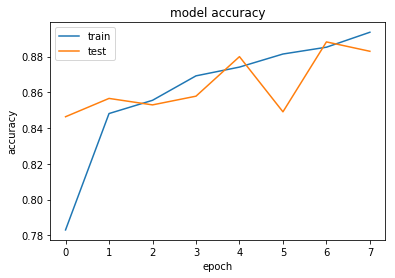

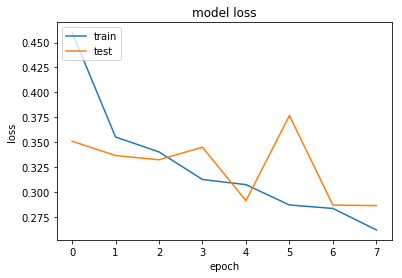

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [36]:
text = ['I laughed all the way through this rotten movie It so unbelievable woman leaves her husband after many years of marriage has breakdown in front of real estate office What happens The office manager comes outside and offers her job Hilarious Next thing you know the two women are going at it Yep they re lesbians Nothing rings true in this Lifetime for Women with nothing better to do movie Clunky dialogue like don want to spend the rest of my life feeling like had chance to be happy and didn take it doesn help There a wealthy distant mother who disapproves of her daughter new relationship sassy black maid unbelievable that in the year film gets made in which there a sassy black maid Hattie McDaniel must be turning in her grave The woman has husband who freaks out and wants custody of the snotty teenage kids Sheesh No cliche is left unturned']

### Testing on some Data 

In [37]:
pre = text
pre_sequences = tokenizer.texts_to_sequences(pre)
pre_padded = pad_sequences(pre_sequences,maxlen=maxlen, padding='post')
prediction = model.predict(pre_padded)
prediction

array([[0.17419286]], dtype=float32)